# Study 2

I'll analyse a bigger period: 01.2025 - 09.2025

In [1]:
import pandas as pd

# Load the datasets
dollar = pd.read_csv('./dataset/btc-01_2025-09-2025-dollar-15min/btc-01_2025-09-2025-dollar-15min.csv')
volume = pd.read_csv('./dataset/btc-01_2025-09-2025-volume-15min/btc-01_2025-09-2025-volume-15min.csv')
tick = pd.read_csv('./dataset/btc-01_2025-09-2025-tick-15min/btc-01_2025-09-2025-tick-15min.csv')

In [2]:
dollar.shape, volume.shape, tick.shape

((19384, 10), (19686, 10), (19919, 10))

In [3]:
dollar['date_time'] = pd.to_datetime(dollar['date_time'])
volume['date_time'] = pd.to_datetime(volume['date_time'])
tick['date_time'] = pd.to_datetime(tick['date_time'])
dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19384 entries, 0 to 19383
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date_time         19384 non-null  datetime64[ns, UTC]
 1   tick_num          19384 non-null  int64              
 2   open              19384 non-null  float64            
 3   high              19384 non-null  float64            
 4   low               19384 non-null  float64            
 5   close             19384 non-null  float64            
 6   volume            19384 non-null  float64            
 7   cum_buy_volume    19384 non-null  float64            
 8   cum_ticks         19384 non-null  int64              
 9   cum_dollar_value  19384 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(2)
memory usage: 1.5 MB


In [4]:
dollar = dollar.set_index('date_time')
volume = volume.set_index('date_time')
tick = tick.set_index('date_time')

In [5]:
# How many candle were produced on average per day
dollar.resample('D').size().mean(), volume.resample('D').size().mean(), tick.resample('D').size().mean()

(71.00366300366301, 72.10989010989012, 72.96336996336996)

In [6]:
# How many candle were produced on average per week
dollar.resample('W').size().mean(), volume.resample('W').size().mean(), tick.resample('W').size().mean()

(484.6, 492.15, 497.975)

In [7]:
dollar_candles_per_week = dollar.resample('W').size()
volume_candles_per_week = volume.resample('W').size()
tick_candles_per_week = tick.resample('W').size()

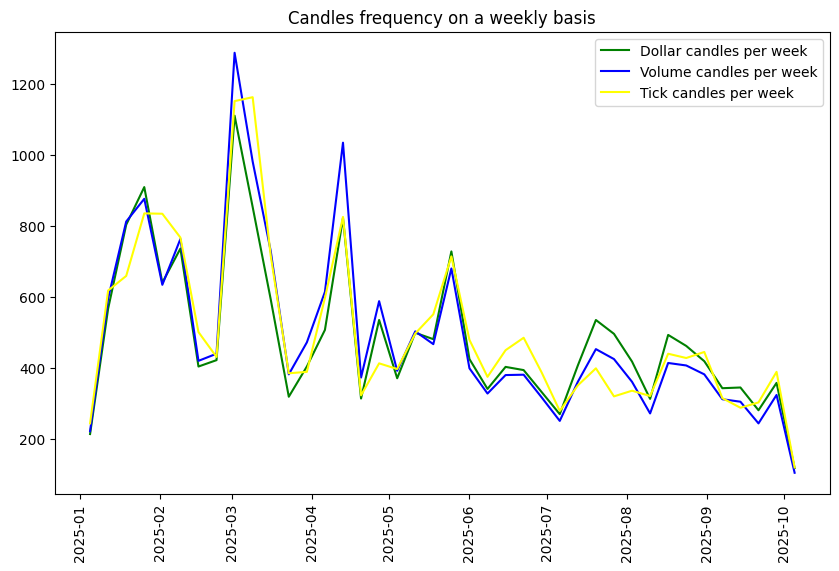

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Candles frequency on a weekly basis')

plt.plot(dollar_candles_per_week, label='Dollar candles per week', color='green')
plt.plot(volume_candles_per_week, label='Volume candles per week', color='blue')
plt.plot(tick_candles_per_week, label='Tick candles per week', color='yellow')

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [9]:
import numpy as np

tick_counts = pd.DataFrame(columns=['Timeframe', 'Value'])
volume_counts = pd.DataFrame(columns=['Timeframe', 'Value'])
dollar_counts = pd.DataFrame(columns=['Timeframe', 'Value'])

def compute_candle_freq_std(timeframe: str,save_in_vars=False,tick_candles_per_week=tick_candles_per_week, volume_candles_per_week=volume_candles_per_week, dollar_candles_per_week=dollar_candles_per_week):
    global tick_counts, volume_counts, dollar_counts
    
    tick_std = np.std(tick_candles_per_week)
    volume_std = np.std(volume_candles_per_week)
    dollar_std = np.std(dollar_candles_per_week)

    print(f'Tick std for {timeframe} is {tick_std}')
    print(f'Volume std for {timeframe} is {volume_std}')
    print(f'Dollar std is {timeframe} {dollar_std}')
    print('=======================')
    
    if save_in_vars:
        tick_counts = pd.concat(
            [tick_counts, pd.DataFrame([{'Timeframe': timeframe, 'Value': tick_std}])],
            ignore_index=True
        )

        volume_counts = pd.concat(
            [volume_counts, pd.DataFrame([{'Timeframe': timeframe, 'Value': volume_std}])],
            ignore_index=True
        )

        dollar_counts = pd.concat(
            [dollar_counts, pd.DataFrame([{'Timeframe': timeframe, 'Value': dollar_std}])],
            ignore_index=True
        )
compute_candle_freq_std('W')

Tick std for W is 225.95635502238036
Volume std for W is 240.99362543436706
Dollar std is W 202.32372574663606


We saw that the dollar bars produced the most stable weekly count while the volume bars produced the worst

In [10]:
time_counts = ['h','4h','12h','D','3D','W','M']
for time in time_counts:
    dollar_candles_per_week = dollar.resample(time).size()
    volume_candles_per_week = volume.resample(time).size()
    tick_candles_per_week = tick.resample(time).size()
    compute_candle_freq_std(time,save_in_vars=True, tick_candles_per_week=tick_candles_per_week, volume_candles_per_week=volume_candles_per_week, dollar_candles_per_week=dollar_candles_per_week)

Tick std for h is 2.7897543630959727
Volume std for h is 3.455363870067369
Dollar std is h 3.217082480400568
Tick std for 4h is 9.56561979068893
Volume std for 4h is 11.028087421631719
Dollar std is 4h 10.12072526088764
Tick std for 12h is 24.832859480562234
Volume std for 12h is 27.59228111950756
Dollar std is 12h 25.061992668163498
Tick std for D is 43.6351688694993
Volume std for D is 48.59071435195562
Dollar std is D 43.457317544009385
Tick std for 3D is 108.35639714979743
Volume std for 3D is 119.31416235909197
Dollar std is 3D 103.29148923010794
Tick std for W is 225.95635502238036
Volume std for W is 240.99362543436706
Dollar std is W 202.32372574663606
Tick std for M is 588.1382637475227
Volume std for M is 643.0747321354736
Dollar std is M 474.08878160056287


/tmp/ipykernel_10962/708404071.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tick_counts = pd.concat(
/tmp/ipykernel_10962/708404071.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  volume_counts = pd.concat(
/tmp/ipykernel_10962/708404071.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclud

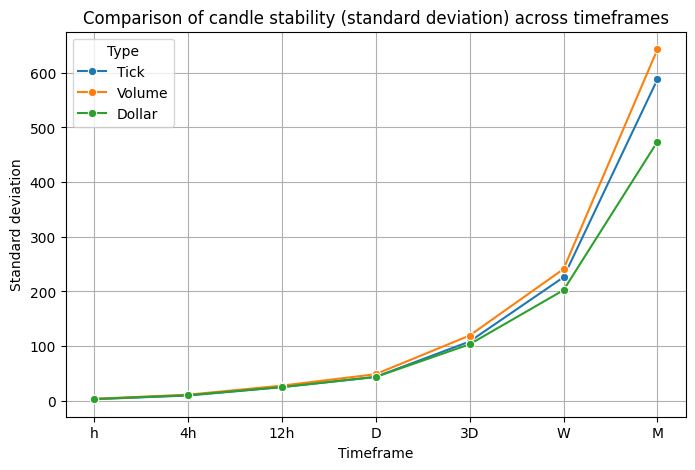

In [11]:
import seaborn as sns

tick_counts['Type'] = 'Tick'
volume_counts['Type'] = 'Volume'
dollar_counts['Type'] = 'Dollar'

all_counts = pd.concat([tick_counts, volume_counts, dollar_counts], ignore_index=True)
plt.figure(figsize=(8,5))
sns.lineplot(data=all_counts, x='Timeframe', y='Value', hue='Type', marker='o')
plt.title('Comparison of candle stability (standard deviation) across timeframes')
plt.xlabel('Timeframe')
plt.ylabel('Standard deviation')
plt.grid(True)
plt.show()


I’ve plotted the standard deviation of the three candle frequencies from one hour to one month.
We can see that the hierarchy of candle frequency standard deviations remains consistent across different timeframes.

# Serial Correlation study

In [12]:
from utils.statistics.correlation import compute_returns, compute_serial_correlation, analyze_serial_correlation, plot_serial_correlations, ljung_box_test

In [13]:
dataframes = {
    'tick': tick,
    'volume': volume,
    'dollar': dollar
}


TICK DataFrame:
Number of observations: 19918
Mean returns: 0.000010
Standard deviation: 0.002694

Serial correlations for first 5 lags:
1   -0.020128
2    0.006633
3    0.001607
4   -0.010606
5    0.000097
Name: serial_correlation, dtype: float64

VOLUME DataFrame:
Number of observations: 19685
Mean returns: 0.000010
Standard deviation: 0.002715

Serial correlations for first 5 lags:
1   -0.019128
2   -0.004450
3   -0.002520
4    0.012720
5   -0.008652
Name: serial_correlation, dtype: float64

DOLLAR DataFrame:
Number of observations: 19383
Mean returns: 0.000010
Standard deviation: 0.002717

Serial correlations for first 5 lags:
1   -0.017758
2   -0.010424
3    0.014966
4    0.011139
5   -0.002987
Name: serial_correlation, dtype: float64


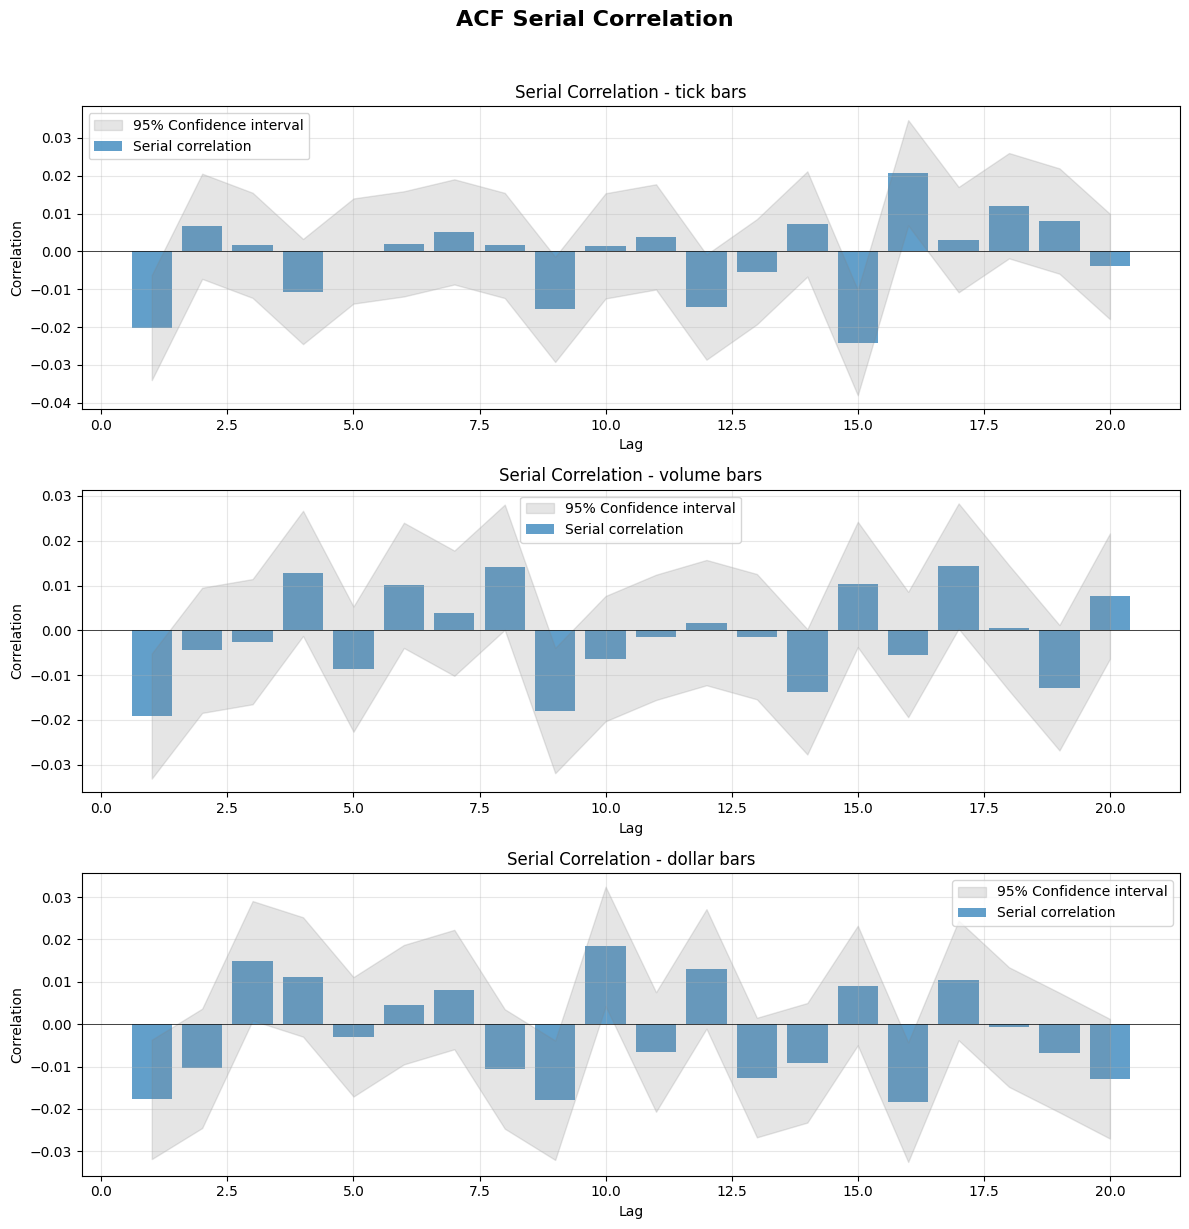

In [25]:

results = analyze_serial_correlation(dataframes, max_lags=20)
plot_serial_correlations(results,overall_title='ACF Serial Correlation')

## Ljung-Box test



LJUNG-BOX TEST (H0: No autocorrelation)

TICK bars:
      lb_stat  lb_pvalue
1    8.068692   0.004504
2    8.944815   0.011420
3    8.996208   0.029341
4   11.236032   0.024036
5   11.236219   0.046892
6   11.315205   0.079110
7   11.844492   0.105790
8   11.893554   0.156017
9   16.573605   0.055827
10  16.616437   0.083294

VOLUME bars:
      lb_stat  lb_pvalue
1    7.202156   0.007282
2    7.591964   0.022461
3    7.716965   0.052238
4   10.901997   0.027688
5   12.375177   0.029993
6   14.365612   0.025808
7   14.654808   0.040688
8   18.568513   0.017346
9   24.882082   0.003104
10  25.664678   0.004218

DOLLAR bars:
      lb_stat  lb_pvalue
1    6.112009   0.013427
2    8.217579   0.016428
3   12.557938   0.005697
4   14.962586   0.004779
5   15.135517   0.009799
6   15.546232   0.016408
7   16.839763   0.018459
8   19.004691   0.014835
9   25.246083   0.002711
10  31.757584   0.000439


SERIAL CORRELATIONS COMPARISON
        tick    volume    dollar
1  -0.020128 -0.019128 -0.0

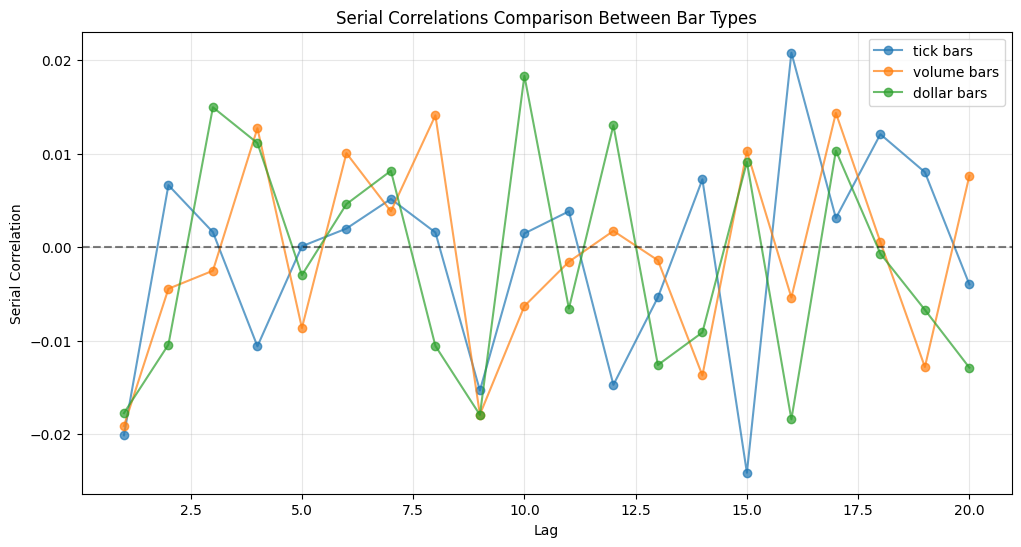

In [26]:
# Ljung-Box test for each bar type
print("\n\nLJUNG-BOX TEST (H0: No autocorrelation)")
print("=" * 60)
for name, data in results.items():
    print(f"\n{name.upper()} bars:")
    lb_test = ljung_box_test(data['returns'], lags=10)
    print(lb_test[['lb_stat', 'lb_pvalue']])

# Direct comparison of correlations for first lags
comparison_df = pd.DataFrame({
    name: data['serial_correlation'] 
    for name, data in results.items()
})

print("\n\nSERIAL CORRELATIONS COMPARISON")
print("=" * 40)
print(comparison_df.head(10))

# Comparative plot
plt.figure(figsize=(12, 6))
for name in dataframes.keys():
    plt.plot(results[name]['serial_correlation'], 
             marker='o', label=f'{name} bars', alpha=0.7)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Lag')
plt.ylabel('Serial Correlation')
plt.title('Serial Correlations Comparison Between Bar Types')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

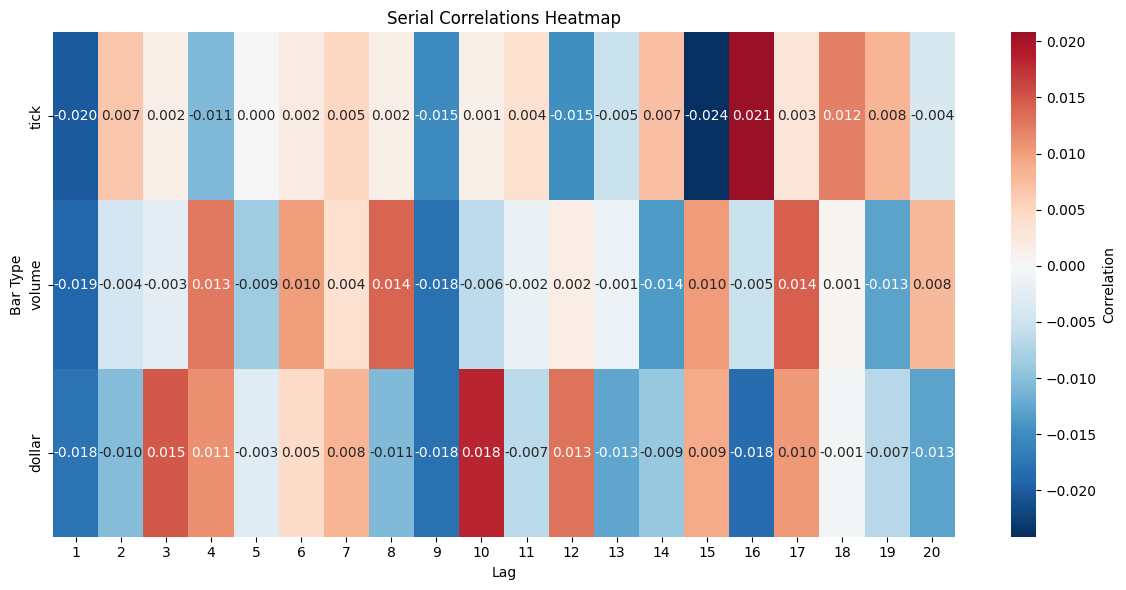

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(comparison_df.T, 
            cmap='RdBu_r', 
            center=0, 
            annot=True, 
            fmt='.3f',
            cbar_kws={'label': 'Correlation'})
plt.title('Serial Correlations Heatmap')
plt.xlabel('Lag')
plt.ylabel('Bar Type')
plt.tight_layout()
plt.show()

In [28]:
summary_stats = pd.DataFrame({
    name: {
        'Mean Abs Correlation': np.abs(data['serial_correlation']).mean(),
        'Max Abs Correlation': np.abs(data['serial_correlation']).max(),
        'Significant Lags (5%)': (np.abs(data['serial_correlation']) > 
                                  np.abs(data['confidence_intervals'][:, 1])).sum()
    }
    for name, data in results.items()
}).T

In [29]:
print(summary_stats)

        Mean Abs Correlation  Max Abs Correlation  Significant Lags (5%)
tick                0.008396             0.024133                    5.0
volume              0.008456             0.019128                    5.0
dollar              0.010819             0.018413                    8.0


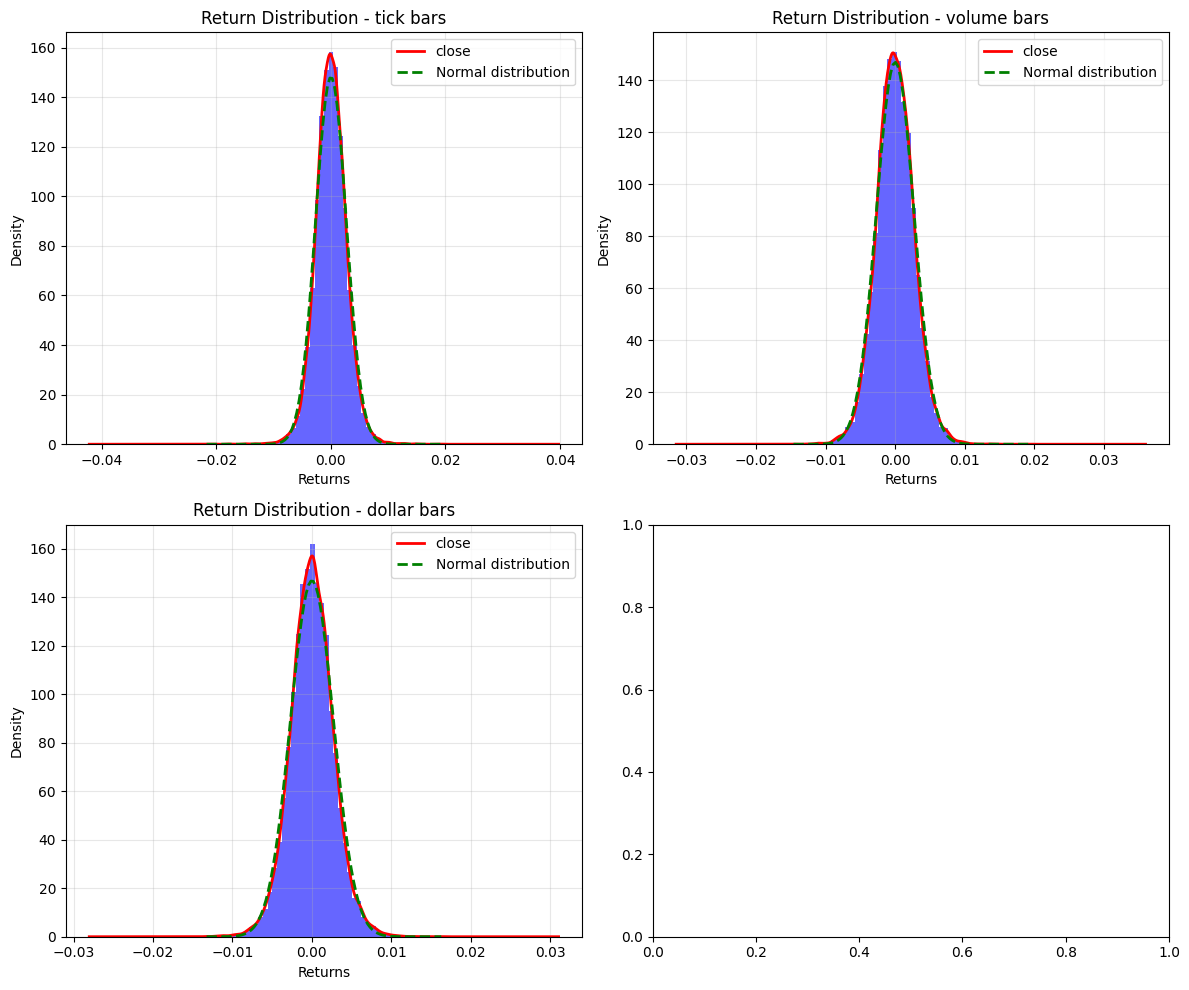

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, data) in enumerate(results.items()):
    ax = axes[idx]
    returns = data['returns']
    
    # Histogram with KDE
    returns.hist(bins=50, density=True, alpha=0.6, color='blue', ax=ax)
    returns.plot.kde(ax=ax, color='red', linewidth=2)
    
    # Add normal distribution for comparison
    x = np.linspace(returns.min(), returns.max(), 100)
    ax.plot(x, 
            1/np.sqrt(2*np.pi*returns.var()) * np.exp(-0.5*((x-returns.mean())/returns.std())**2),
            'g--', linewidth=2, label='Normal distribution')
    
    ax.set_title(f'Return Distribution - {name} bars')
    ax.set_xlabel('Returns')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusions
Based on the comprehensive analysis, a critical trade-off emerges between statistical purity and operational stability. The information-driven sampling methods, specifically **Volume and Tick Bars**, demonstrate superior performance in generating returns with lower serial autocorrelation. This results in a time series with better statistical properties for financial modeling, as the observations are closer to being independent and identically distributed (IID). Conversely, **Dollar Bars** produce a significantly more stable and predictable number of bars over any given timeframe, as evidenced by their lower standard deviation in candle frequency. This stability offers operational advantages, such as more consistent risk exposure and easier strategy implementation. Therefore, the ultimate choice depends on prioritizing either the superior statistical quality of the underlying data for model robustness or the operational consistency offered by a more regular data flow.

In [ ]:
import numpy as np
import pandas as pd
from mlfinpy.filters import cusum_filter  # sau mlfinlab, dacă folosești acel pachet

# prices = seria ta de prețuri (ex.: dollar['close']) indexată pe timp
prices = dollar['close'].sort_index().astype(float)

# 1) log-returns (recomandat de Prado)
log_ret = np.log(prices).diff().dropna()

# 2) volatilitate locală (EWMA a randamentelor)
span = 50  # ~fereastră efectivă; ajustează după frecvența datelor
ewm_vol = log_ret.ewm(span=span, adjust=False).std().dropna()

c = 3.0 

threshold_const = float(c * ewm_vol.median())

cusum_events = cusum_filter(prices, threshold=threshold_const)

print(f"Evenimente CUSUM: {len(cusum_events)}")


Evenimente CUSUM: 2516


In [78]:
dollar_filtered = dollar.loc[cusum_events]


In [79]:
dollar_filtered

tick_num       open       high        low  \
2025-01-01 06:35:30.248737+00:00    354751   93693.18   93937.19   93588.00   
2025-01-01 12:29:29.842200+00:00    676243   93417.21   93972.00   93407.07   
2025-01-01 19:56:11.550031+00:00   1250145   94243.99   94823.75   94234.03   
2025-01-02 00:53:29.820257+00:00   1680194   95059.40   95381.70   94977.27   
2025-01-02 04:38:35.400213+00:00   1991520   95120.92   95742.83   95045.83   
...                                    ...        ...        ...        ...   
2025-09-30 00:50:19.039581+00:00  61721551  114041.64  114622.00  114040.35   
2025-09-30 07:43:52.549230+00:00  62379660  113956.15  113994.61  113596.37   
2025-09-30 09:50:01.980777+00:00  62638757  112981.36  113081.31  112813.28   
2025-09-30 19:07:16.450555+00:00  64140626  113440.50  113914.00  113396.15   
2025-09-30 20:59:43.667561+00:00  64393141  114366.27  114723.57  114307.01   

                                      close     volume  cum_buy_volume  \
2025-01-01 06:35:30.248737+00:00   93588.00  311.58870       184.03307   
2025-01-01 12:29:29.842200+00:00   93902.61  311.68309       225.01993   
2025-01-01 19:56:11.550031+00:00   94574.63  309.08669       186.68544   
2025-01-02 00:53:29.820257+00:00   95295.20  306.66228       183.37520   
2025-01-02 04:38:35.400213+00:00   95695.93  305.91849       216.03095   
...                                     ...        ...             ...   
2025-09-30 00:50:19.039581+00:00  114622.00  255.48218       145.48692   
2025-09-30 07:43:52.549230+00:00  113634.08  256.66023        91.78257   
2025-09-30 09:50:01.980777+00:00  112888.72  258.57260       162.20101   
2025-09-30 19:07:16.450555+00:00  113716.47  256.86376       132.85887   
2025-09-30 20:59:43.667561+00:00  114615.67  255.09631       133.96226   

                                  cum_ticks  cum_dollar_value  
2025-01-01 06:35:30.248737+00:00      42314      2.920505e+07  
2025-01-01 12:29:29.842200+00:00      33096      2.920036e+07  
2025-01-01 19:56:11.550031+00:00      43123      2.923488e+07  
2025-01-02 00:53:29.820257+00:00      39687      2.920164e+07  
2025-01-02 04:38:35.400213+00:00      29936      2.920857e+07  
...                                     ...               ...  
2025-09-30 00:50:19.039581+00:00      37930      2.920248e+07  
2025-09-30 07:43:52.549230+00:00      26963      2.920098e+07  
2025-09-30 09:50:01.980777+00:00      40718      2.920128e+07  
2025-09-30 19:07:16.450555+00:00      40583      2.920016e+07  
2025-09-30 20:59:43.667561+00:00      44893      2.921108e+07  

[2516 rows x 9 columns]

In [87]:
import pandas as pd
import numpy as np

# Presupunem că ai deja dollar_filtered (DatetimeIndex + coloana 'close')
# Ajustează fereastra după nevoie:
window = 20

dff = dollar_filtered.sort_index().copy()

# Media mobilă și benzile ±5%
ma = dff['close'].rolling(window=window, min_periods=window).mean()
upper = ma * 1.04
lower = ma * 0.96

# Starea "în interiorul benzilor"
inside = (dff['close'] >= lower) & (dff['close'] <= upper)

# Bară anterioară în interior, bară curentă în exterior
inside_prev = inside.shift(1)

above_now = dff['close'] > upper
below_now = dff['close'] < lower
outside_now = above_now | below_now

# Tranziții din interior -> exterior
crossing_out = inside_prev & outside_now
up_cross_out = inside_prev & above_now
down_cross_out = inside_prev & below_now

# Numărători (ignoră NaN-urile inițiale ale ferestrei)
total_crosses = int(crossing_out.sum())
up_crosses = int(up_cross_out.sum())
down_crosses = int(down_cross_out.sum())

print("Total crosses out (from inside to outside):", total_crosses)
print("  Upward crosses out (above upper band):   ", up_crosses)
print("  Downward crosses out (below lower band): ", down_crosses)


Total crosses out (from inside to outside): 31
  Upward crosses out (above upper band):    22
  Downward crosses out (below lower band):  9


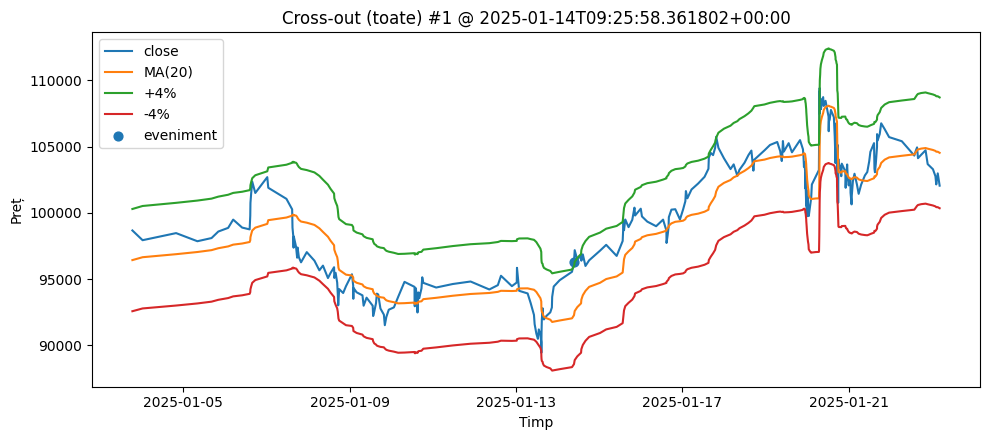

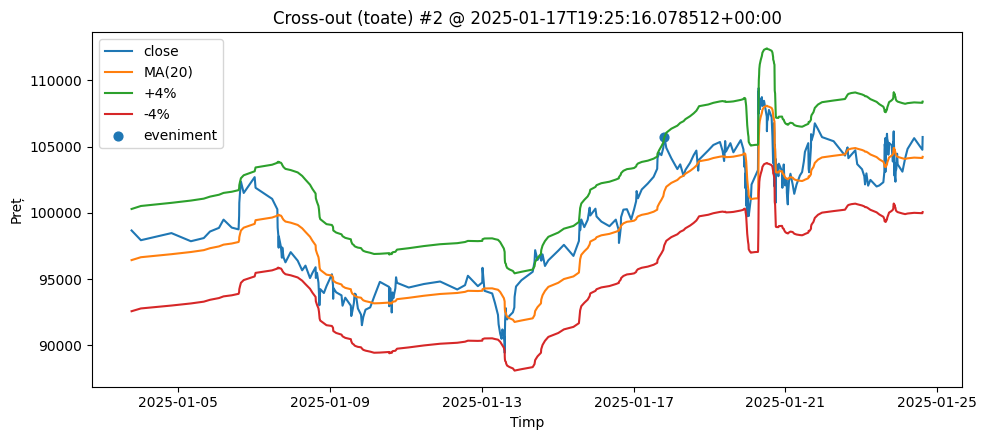

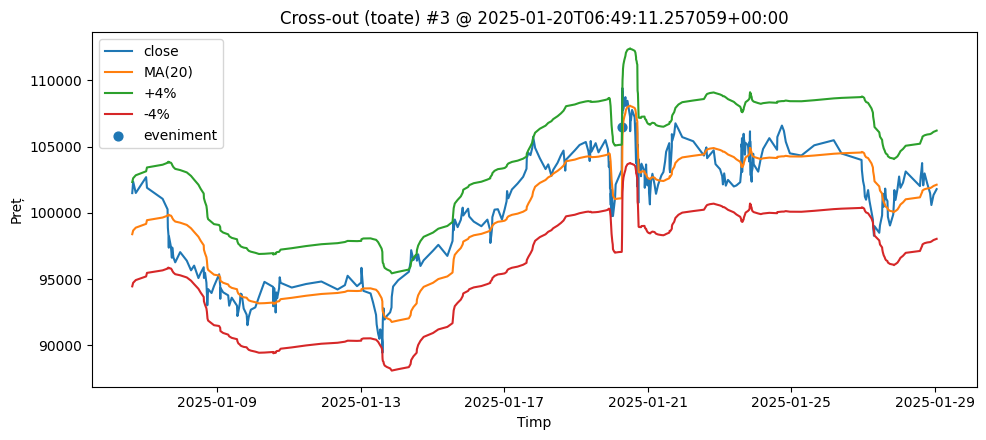

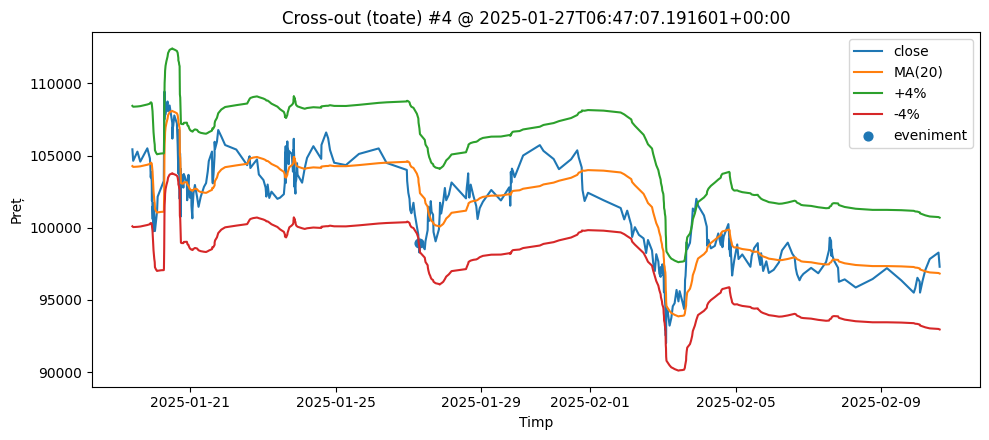

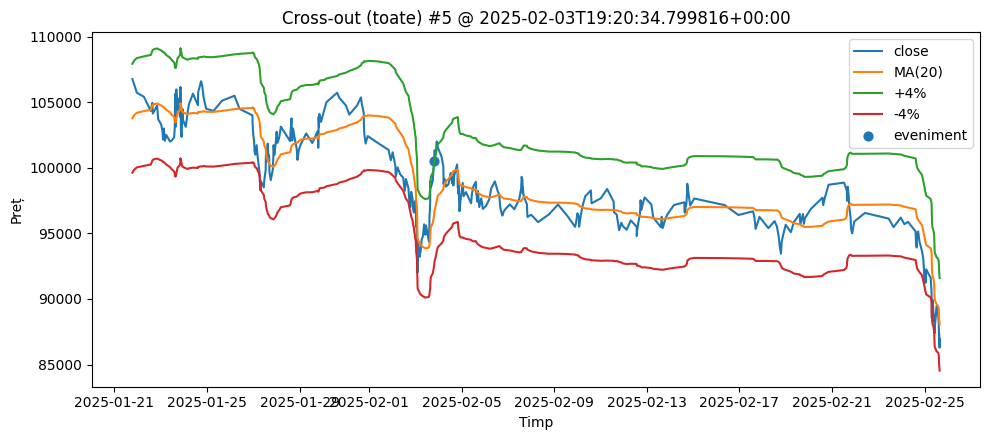

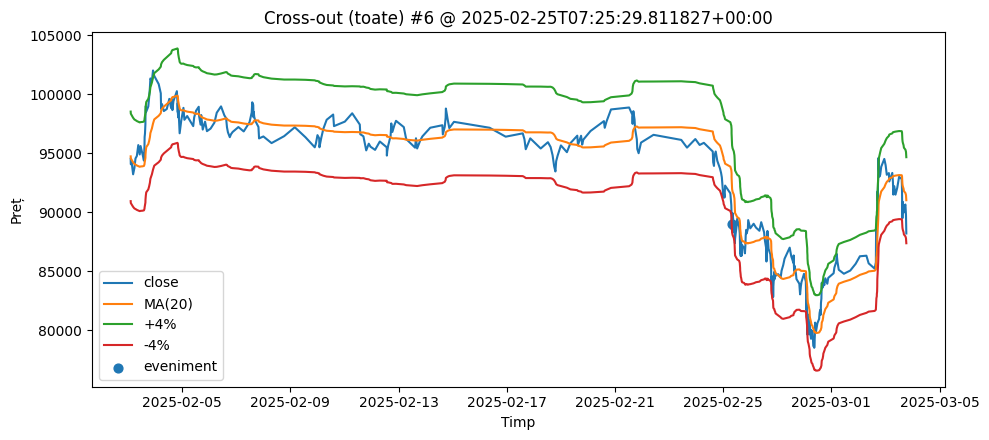

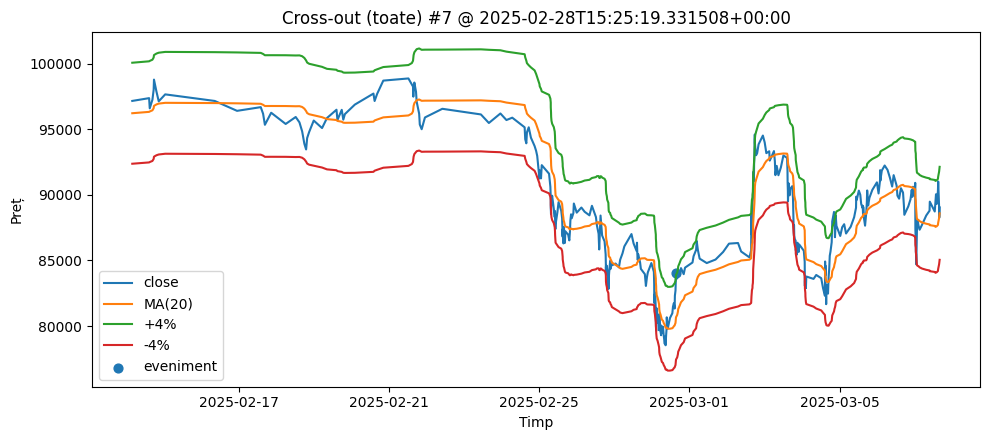

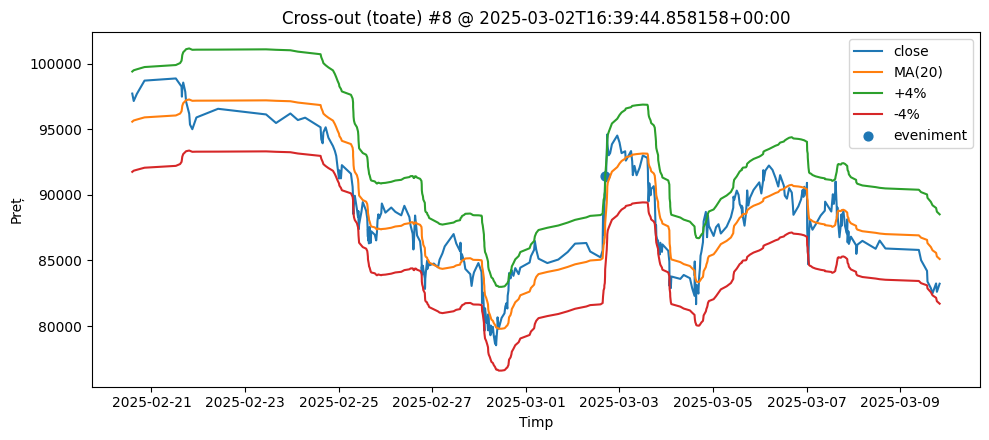

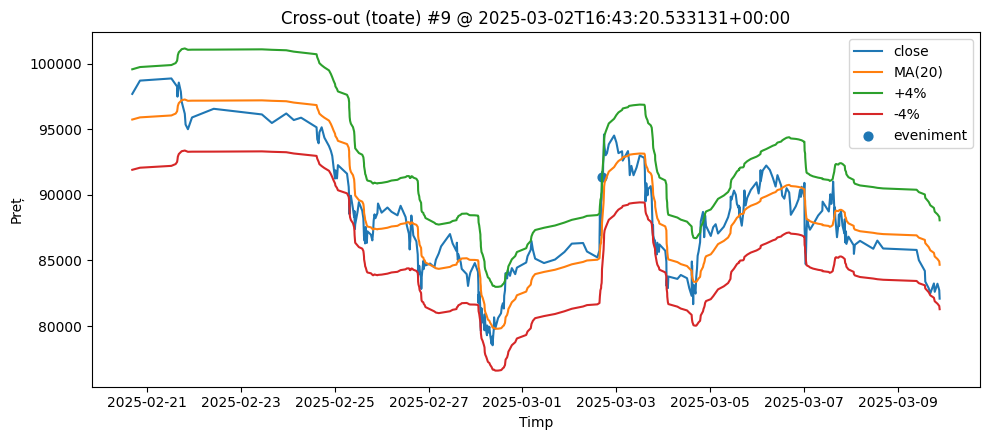

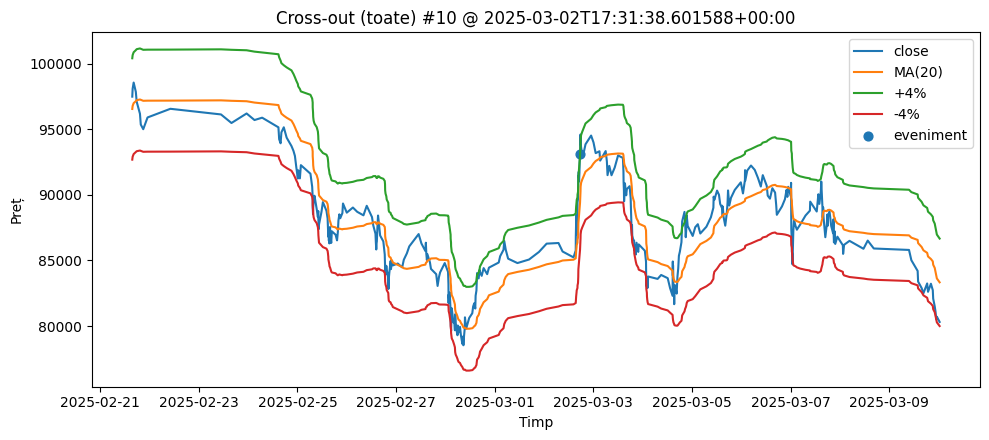

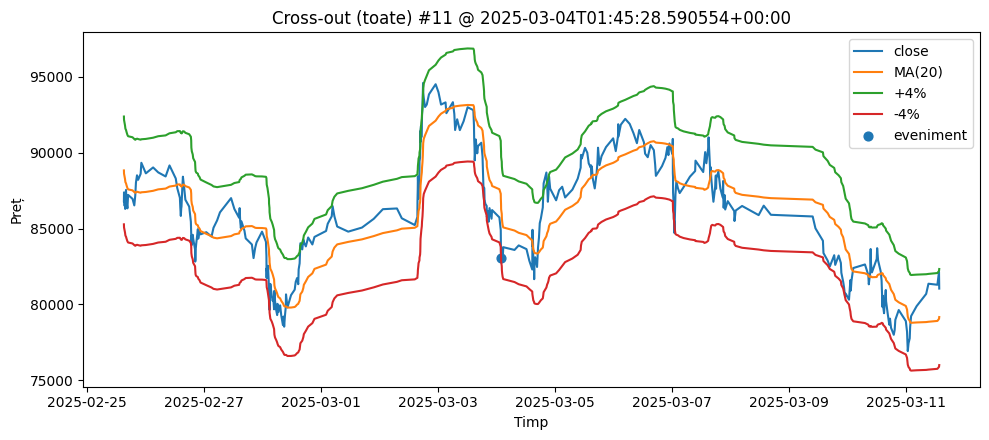

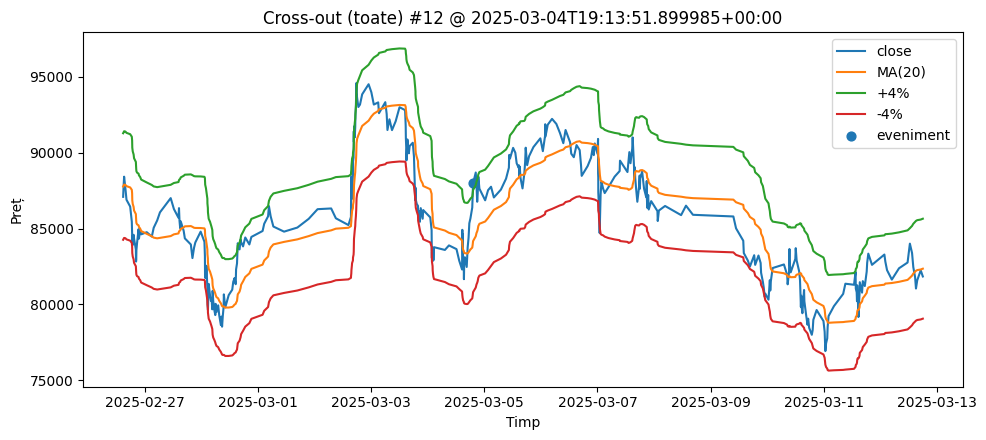

Generat 12 ploturi (Cross-out (toate)).


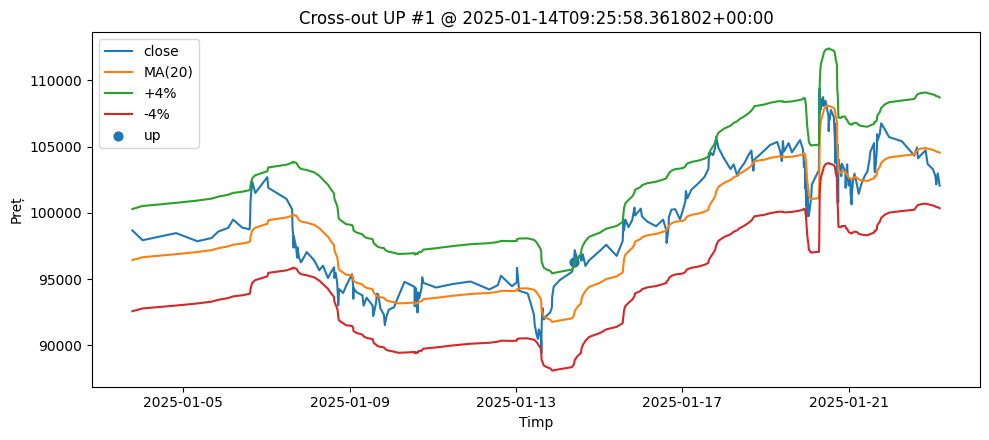

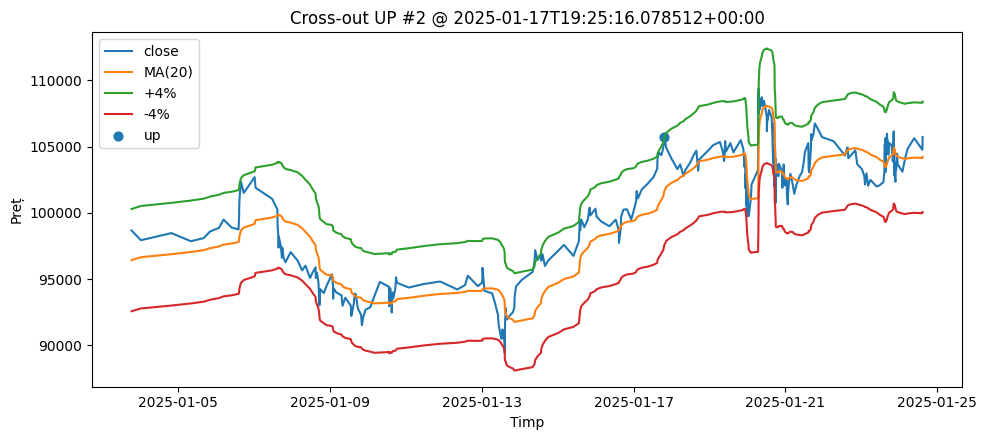

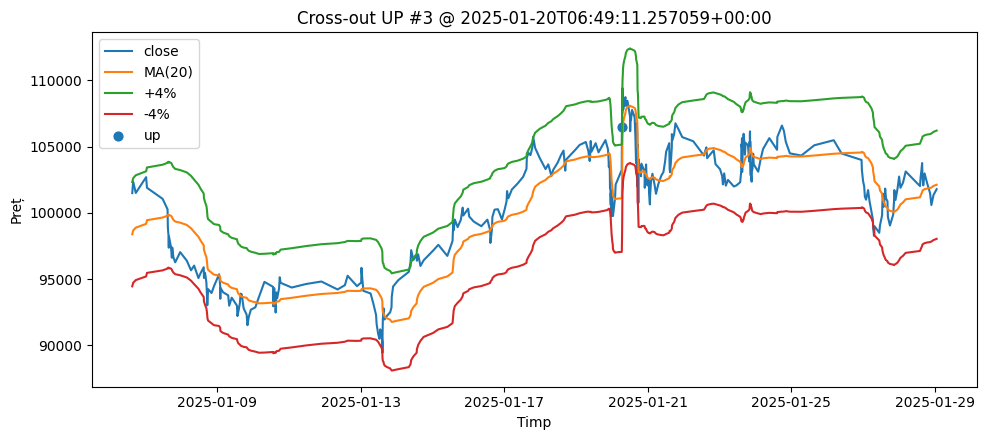

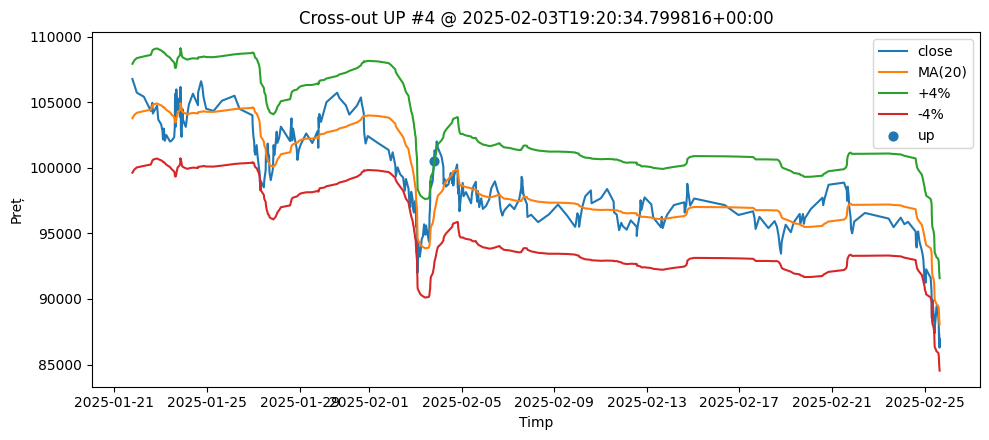

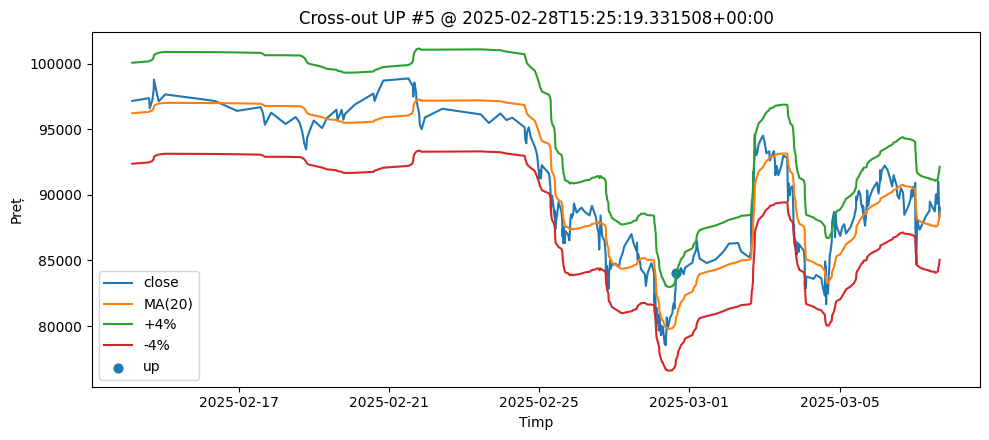

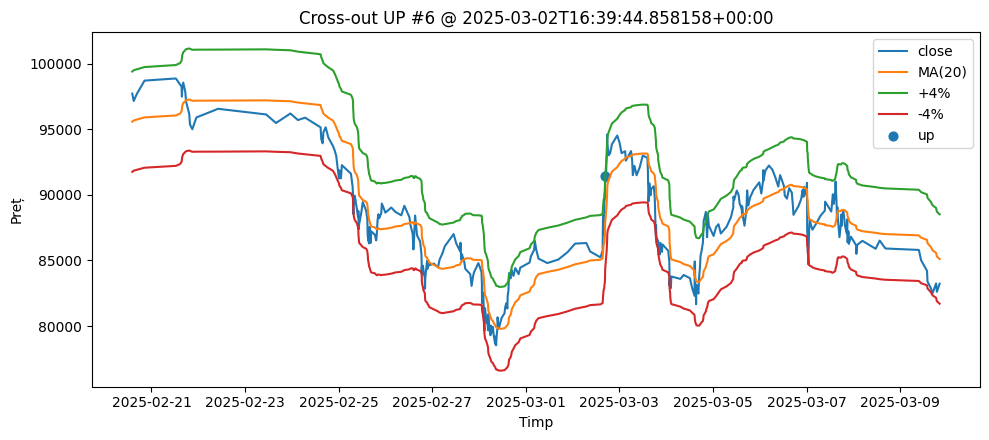

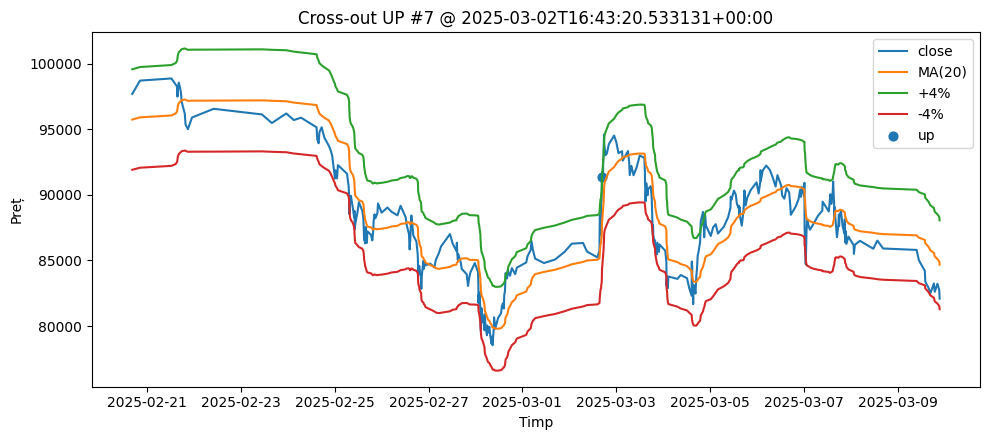

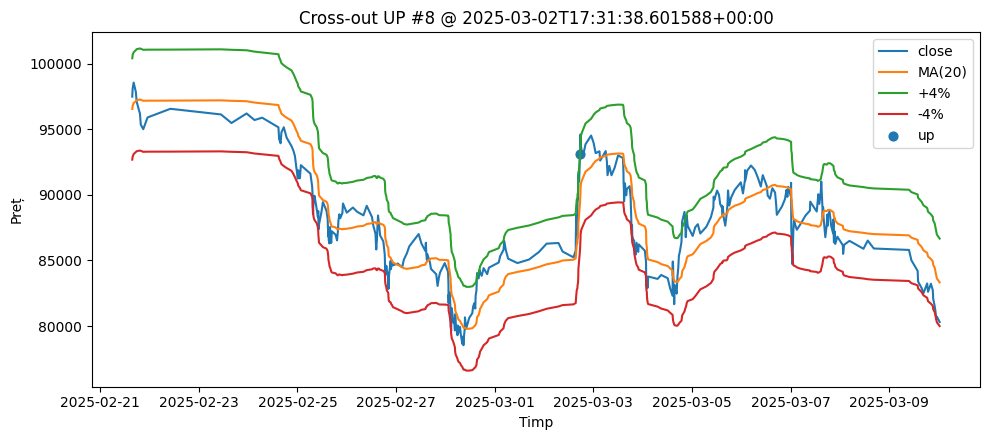

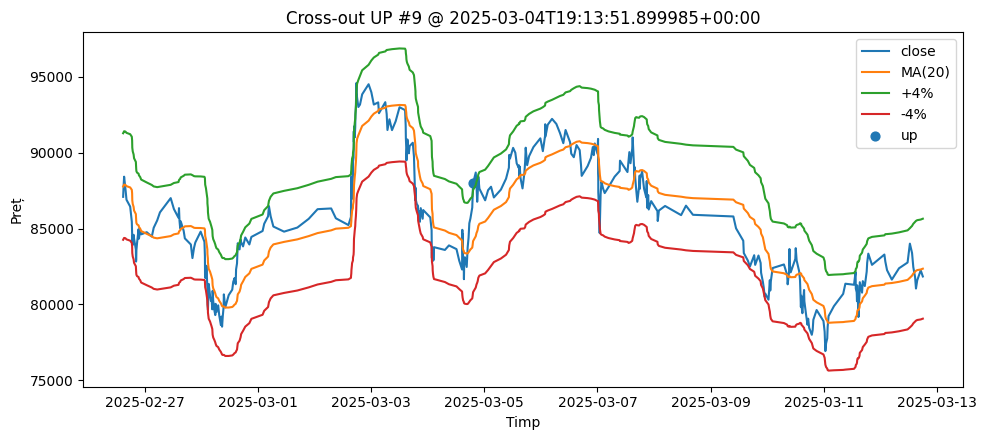

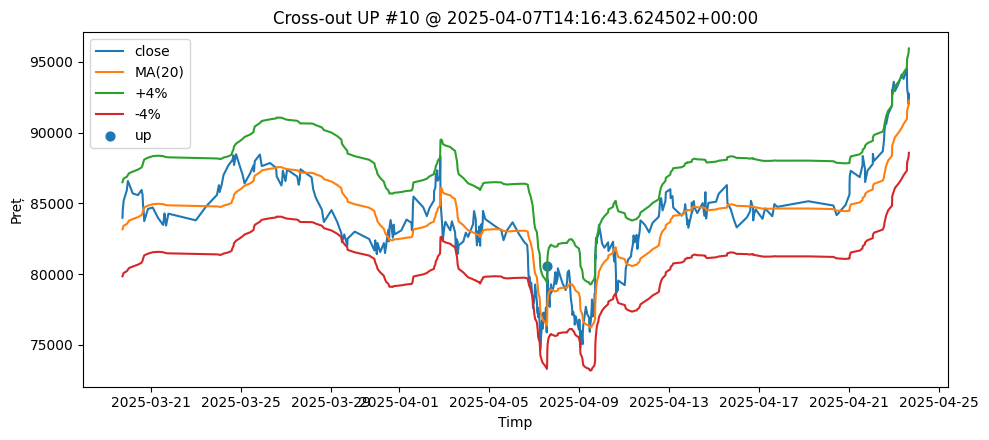

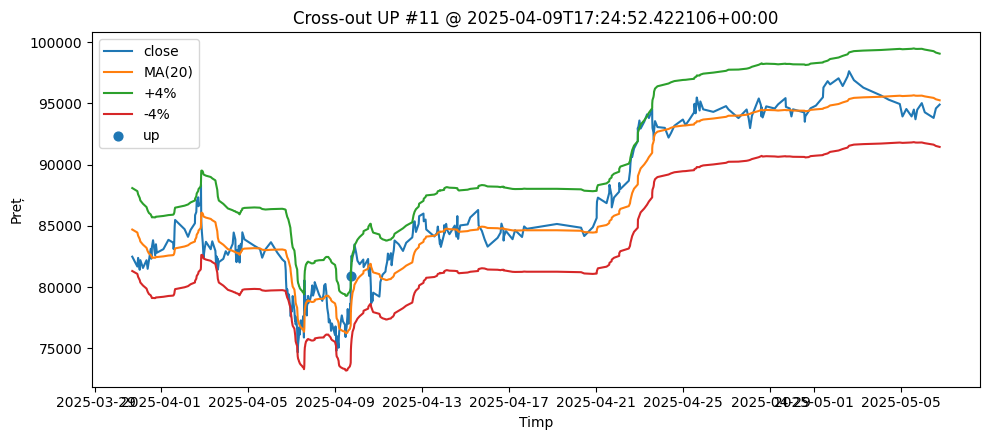

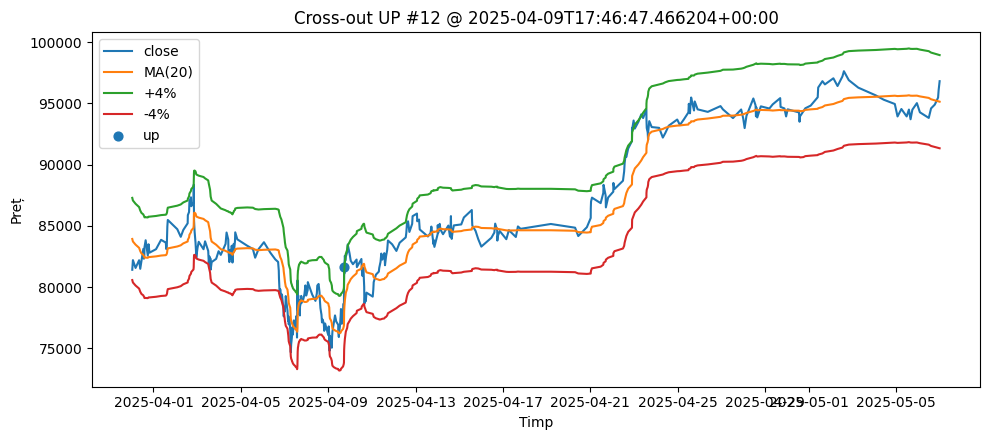

Generat 12 ploturi (Cross-out UP).


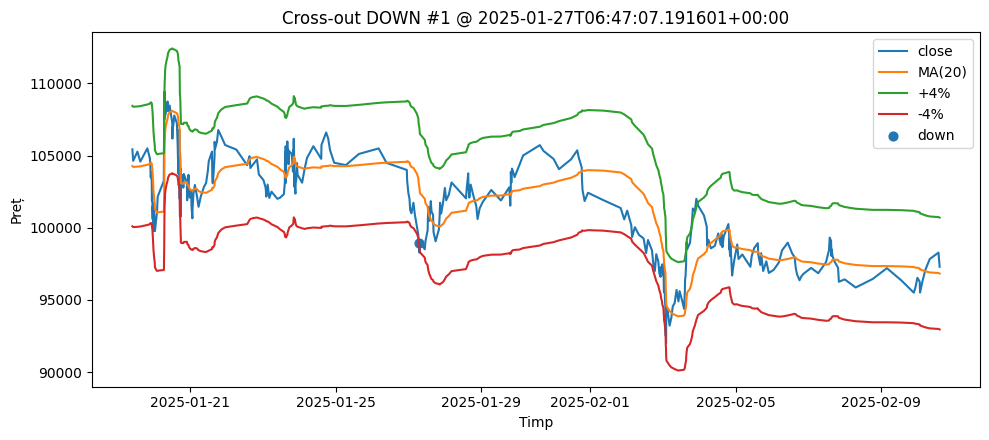

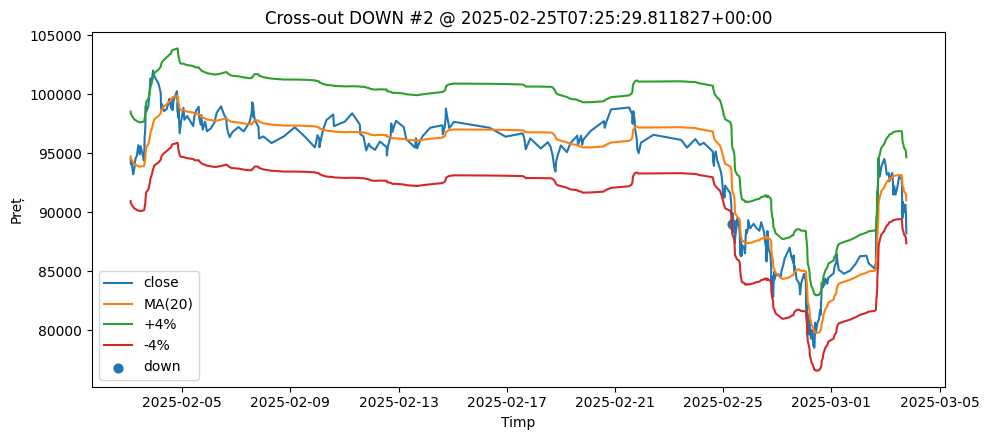

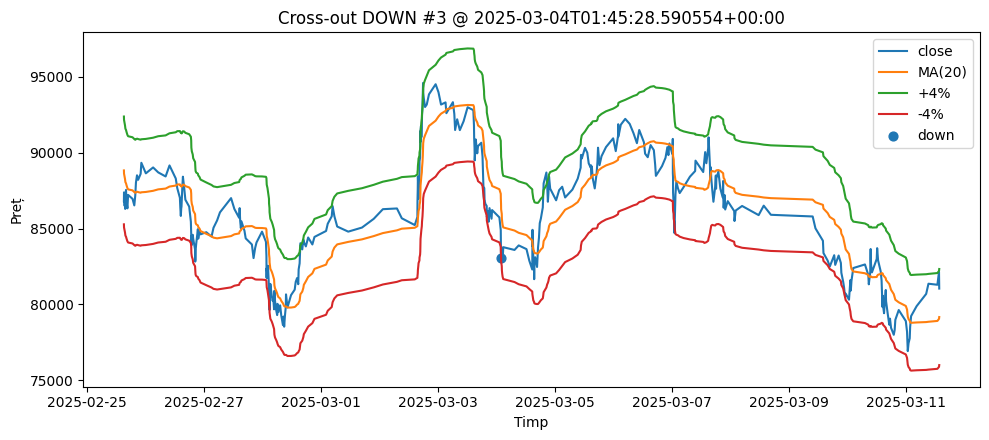

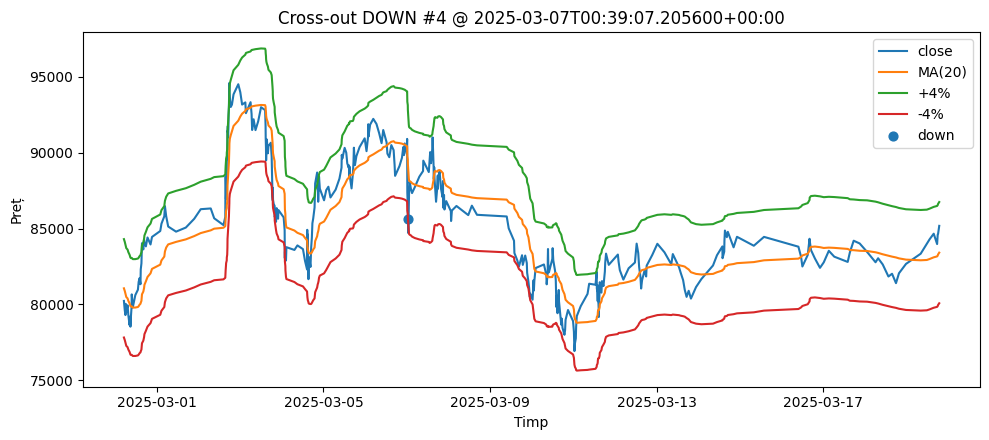

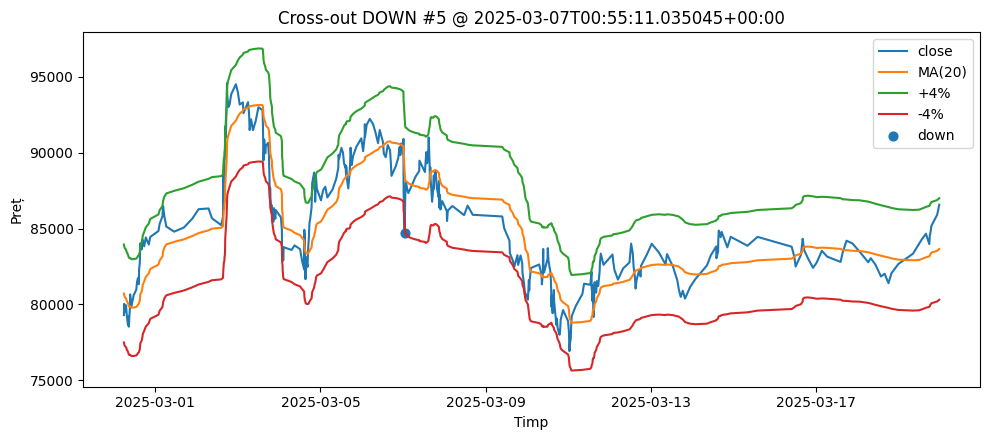

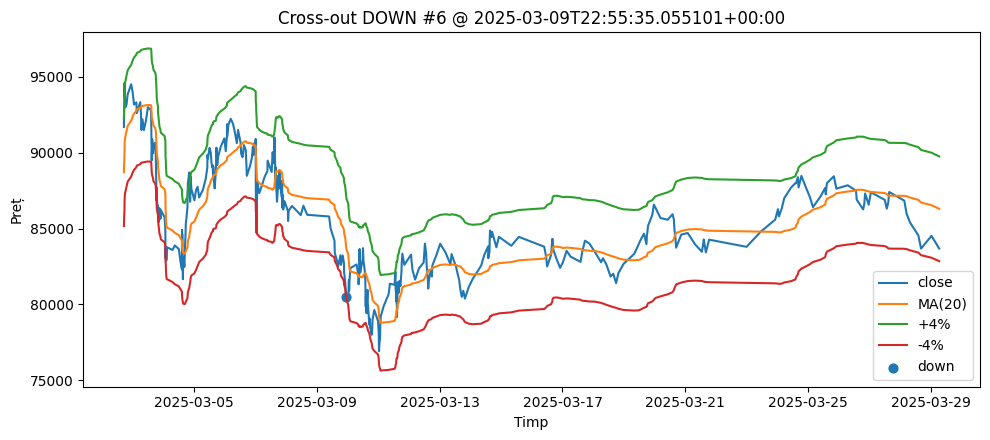

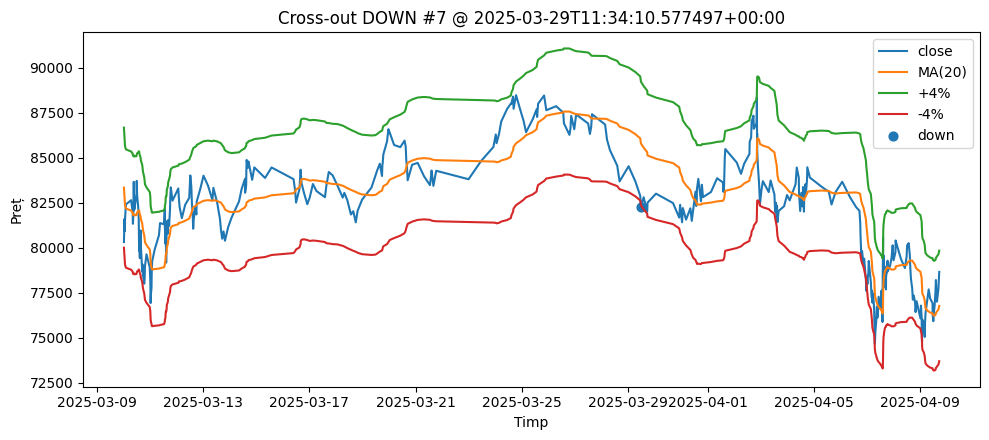

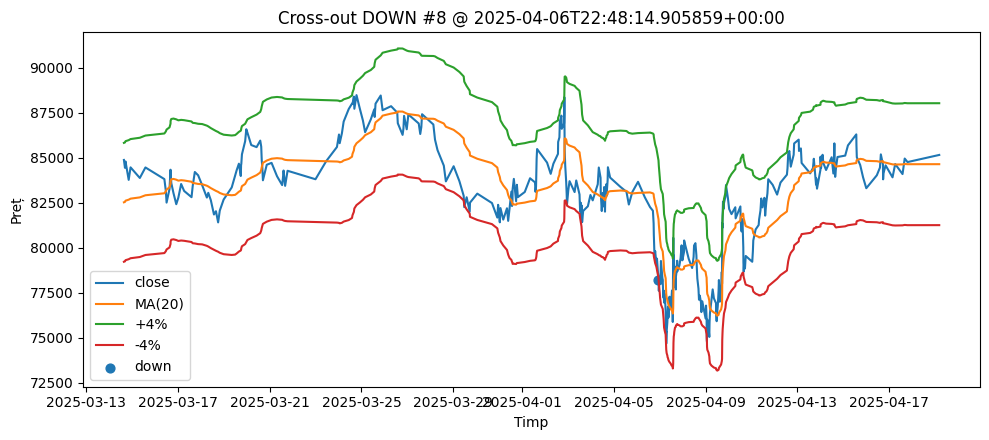

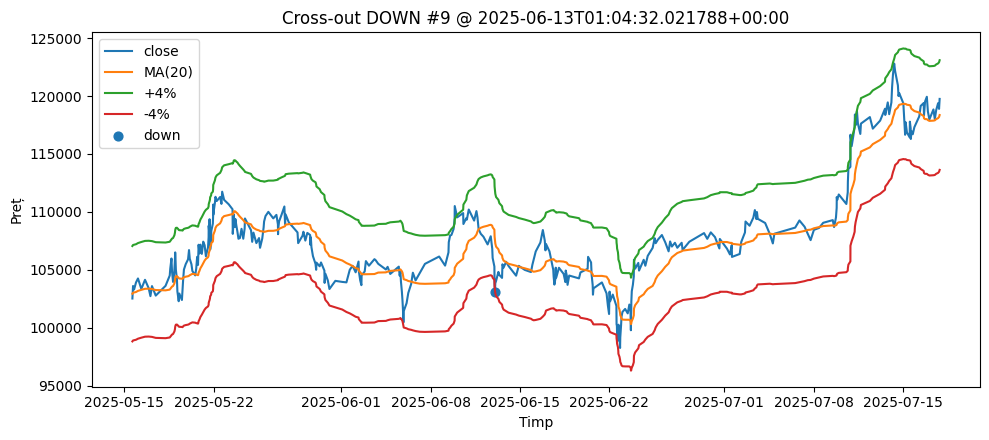

Generat 9 ploturi (Cross-out DOWN).


In [88]:
# Ploturi în jurul evenimentelor de cross-out (din interior -> în afara benzilor)
# Folosește variabilele deja definite: dff, ma, upper, lower, crossing_out, up_cross_out, down_cross_out

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Extrage timestamp-urile evenimentelor (up / down / toate)
cross_dates_all = dff.index[crossing_out]
cross_dates_up = dff.index[up_cross_out]
cross_dates_down = dff.index[down_cross_out]

# 2) Parametri fereastră și limită la numărul de ploturi (ca să nu faci sute)
bars_before = 200
bars_after  = 200
max_plots   = 12   # modifică după nevoie

def _nearest_position(idx: pd.DatetimeIndex, t: pd.Timestamp) -> int:
    """Returnează poziția în index cea mai apropiată de t (prioritizează exact/mai mic egal)."""
    if t in idx:
        return idx.get_loc(t)
    insert_pos = idx.searchsorted(t, side="left")
    if insert_pos == 0:
        return 0
    if insert_pos >= len(idx):
        return len(idx) - 1
    # alege cel mai apropiat între vecinul din stânga și cel din dreapta
    left = insert_pos - 1
    right = insert_pos
    if abs(idx[left] - t) <= abs(idx[right] - t):
        return left
    return right

def plot_around_events(event_dates: pd.DatetimeIndex, title_prefix: str, marker_label: str):
    idx = dff.index
    plotted = 0
    for t in pd.to_datetime(pd.Index(event_dates)).sort_values().unique():
        if plotted >= max_plots:
            break

        pos = _nearest_position(idx, t)
        start = max(0, pos - bars_before)
        end   = min(len(idx) - 1, pos + bars_after)

        win_idx = idx[start:end+1]
        win = dff.loc[win_idx, ['close']].copy()
        win['ma'] = ma.loc[win_idx]
        win['upper'] = upper.loc[win_idx]
        win['lower'] = lower.loc[win_idx]

        # Elimină porțiunile fără MA/bands la început
        win = win.dropna(subset=['ma','upper','lower'])
        if win.empty:
            continue

        plt.figure(figsize=(10, 4.5))
        plt.plot(win.index, win['close'], label='close')
        plt.plot(win.index, win['ma'], label=f'MA({window})')
        plt.plot(win.index, win['upper'], label='+4%')
        plt.plot(win.index, win['lower'], label='-4%')

        # marchează evenimentul dacă e în fereastră
        if t in win.index:
            y = win.loc[t, 'close']
        else:
            # dacă timestamp-ul exact nu există în fereastră, marchează poziția aleasă
            t_near = idx[pos]
            if t_near in win.index:
                t = t_near
                y = win.loc[t, 'close']
            else:
                y = None

        if y is not None:
            plt.scatter([t], [y], s=40, marker='o', label=marker_label)

        plt.title(f'{title_prefix} #{plotted+1} @ {pd.Timestamp(t).isoformat()}')
        plt.xlabel('Timp')
        plt.ylabel('Preț')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

        plotted += 1

    print(f'Generat {plotted} ploturi ({title_prefix}).')

# 3) Rulează pentru toate evenimentele, și separat pentru up/down (opțional)
plot_around_events(cross_dates_all,  title_prefix='Cross-out (toate)', marker_label='eveniment')
plot_around_events(cross_dates_up,   title_prefix='Cross-out UP',      marker_label='up')
plot_around_events(cross_dates_down, title_prefix='Cross-out DOWN',    marker_label='down')
